<h1 style="text-align: center">Kamil Kaźmierczak 245839 Analiza Danych 04.01.2025r.</h1>

<h1>1. Opis problemu</h1>

<h2>a) Opis zbioru danych, cechy i źródło danych</h2>

Zbiór danych poddany analizie pochodzi z repozytorium UCI Irvine i jest dostępny do pobrania pod adresem <a href="https://archive.ics.uci.edu/dataset/10/automobile">Automobiles</a>.<br><br>
Zgodnie z dostarczonymi informacjami omawiany zbiór danych dotyczy samochodów importowanych w roku 1985. Jeffrey C. Schlimmer jest autorem tego zbioru, który bazując na źródłach takich jak rocznik motoryzacyjny Ward's oraz raporty ubezpieczeniowe opracował zbiór danych do prowadzenia badań nad predyckją cen samochodów za pomocą różnych algorytmów, np. kNN.<br><br>
Przeprowazdone w przeszłości badania wskazywały na przewagę algorytmów instancyjnych, czyli takich jak ww. kNN w porównaniu z regresją liniową w przewidywaniu cen importowanych samochodów.<br><br>
Zbiór posiada 205 rekordów i składa sie z 26 atrybutów, w tym: 15 atrybutów ciągłych (liczby z danego zakresu), 1 liczbowy całkowity i 10 nominalnych (opisowych), np. marka samochodu, rodzaj paliwa, typ nadwozia.<br><br>
Rodzaje danych w zbiorze:
<ul>
    <li>Charakterystyka samochodów</li>
    <li>Ocena ryzyka ubezpieczeniowego (symboling) - skala od "-3" (bezpieczny samochód) do "3" (ryzykowny samochód)</li>
    <li>Normalizowane straty finansowe (normalized-losses)</li>
</ul>
Atrybuty takie jak symboling, normalized-losses, price wskazują na istotne właściwości dla analiz predykcyjnych. Dane nominalne (np. marka, typ paliwa, liczba cylindrów) pozwalają na analizy kategoryczne. Ciągłe zmienne (np. długość, masa, moc) nadają się do analizy korelacji i regresji.
Opisane brakujące wartości w zbiorze oznaczone są jako "?". Dotyczą one następujących atrybutów:
<ul>
    <li>normalized-losses: 41 braków</li>
    <li>bore i stroke: po 4 braki</li>
    <li>price: 4 braki</li>
    <li>horsepower: 2 braki</li>
</ul>

Tłumaczenie kolumn z języka angielskiego na polski:
<ol>
    <li>symboling (symbolizacja ryzyka) - ocena ryzyka ubezepieczeniowego: wartości całkowite od -3(bezpieczny samochód) do 3(ryzykowny samochód)</li>
    <li>normalized-losses (znormalizowane straty) - uśrednione straty ubezpieczeniowe związane z danym modelem samochodu (wyższe wartości oznaczają wyższe koszty ubezpieczenia) : wartości ciągłe od 65 do 256</li>
    <li>make (producent samochodu) - wartości opisowe</li>
    <li>fuel-type (rodzaj paliwa) - wartości opisowe</li>
    <li>aspiration (typ doładowania silnika) - wartości opisowe</li>
    <li>num-of-doors (liczba drzwi) - wartości opisowe</li>
    <li>body-style (styl nadwozia) - wartości opisowe</li>
    <li>drive-wheels (układ napędu) - wartości opisowe</li>
    <li>engine-location (umiejscowienie silnika) - wartości opisowe</li>
    <li>wheel-base (rozstaw osi w calach) - wartości ciągłe od 86.6 do 120.9</li>
    <li>length (długość pojazdu w calach) - wartości ciągłe od 141.1 do 208.1</li>
    <li>width (szerokość pojazdu w calach) - wartości ciągłe od 60.3 do 72.3</li>
    <li>height (wysokość pojazdu w calach) - wartości ciągłe od 47.8 do 59.8</li>
    <li>curb-weight (masa własna pojazdu w funtach) - wartości ciągłe od 1488 do 4066</li>
    <li>engine-type (typ silnika) - wartości opisowe</li>
    <li>num-of-cylinders (liczba cylindrów) - wartości opisowe</li>
    <li>engine-size (pojemność silnika w calach sześciennych) - wartości ciągłe od 61 do 326</li>
    <li>fuel-system (system paliwowy) - wartości opisowe</li>
    <li>bore (średnica cylindra w calach) - wartości ciągłe od 2.54 do 3.94</li>
    <li>stroke (skok tłoka w calach) - wartości ciągłe od 2.07 do 4.17</li>
    <li>compression-ratio (stopień sprężania) - wartości ciągłe od 7 do 23</li>
    <li>horsepower (moc silnika w koniach mechanicznych) - wartości ciągłe od 48 do 288</li>
    <li>peak-rpm (maksymalne obroty silnika na minutę) - wartości ciągłe od 4150 do 6600</li>
    <li>city-mpg (zużycie paliwa w mieście w milach na galon) - wartości ciągłe od 13 do 49</li>
    <li>highway-mpg (zużycie paliwa na autostradzie w milach na galon) - wartości ciągłe od 16 do 54</li>
    <li>price (cena pojazdu w dolarach) - wartości ciągłe od 5118 do 45400</li>
</ol>

<h2>b) Załadowanie potrzebnych bibliotek</h2>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<h2>c) Załadowanie zbióru danych</h2>

In [8]:
# Wczytanie zbioru danych
columns = [
    "symboling", "normalized-losses", "make", "fuel-type", "aspiration",
    "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base",
    "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders",
    "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower",
    "peak-rpm", "city-mpg", "highway-mpg", "price"
]
data = pd.read_csv('imports-85.data', names=columns, na_values="?")

# Wyświetlenie pierwszych wierszy z wczytanego zbioru danych
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


<h1>2. Opis danych</h1>

<h2>a) Statystyki opisowe</h2>

In [11]:
# Wyświetlenie podstawowych informacji o zbiorze danych
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [12]:
# Liczba brakujących wartości w każdej kolumnie w zbiorze
missing_values = data.isnull().sum()
print(missing_values)

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [13]:
# Transpozycja opisów dla lepszej czytelności
data_description = data.describe(include='all').transpose()

# Dodanie kolumny z informacją o brakach danych
data_description['missing_values'] = missing_values

# Wyświetlenie statystyk opisowych z dołączoną informacją o występujących w nich brakach danych
data_description

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,missing_values
symboling,205.0,NaN,NaN,NaN,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0,0
normalized-losses,164.0,NaN,NaN,NaN,122.0,35.442168,65.0,94.0,115.0,150.0,256.0,41
make,205,22,toyota,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
fuel-type,205,2,gas,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
aspiration,205,2,std,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
num-of-doors,203,2,four,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
body-style,205,5,sedan,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
drive-wheels,205,3,fwd,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
engine-location,205,2,front,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
wheel-base,205.0,NaN,NaN,NaN,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9,0


<h2>b) Wizualizacje Danych</h2>

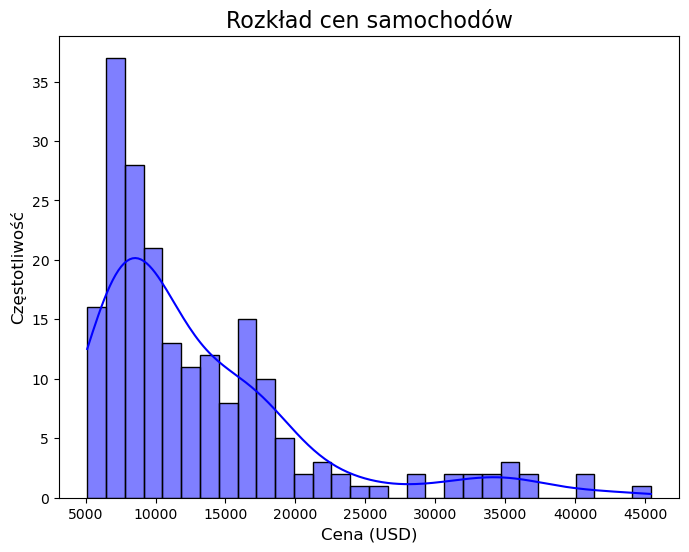

In [15]:
# Rozkład cen samochodów
plt.figure(figsize=(8, 6))
sns.histplot(data['price'], kde=True, bins=30, color='blue')
plt.title('Rozkład cen samochodów', fontsize=16)
plt.xlabel('Cena (USD)', fontsize=12)
plt.ylabel('Częstotliwość', fontsize=12)
plt.show()

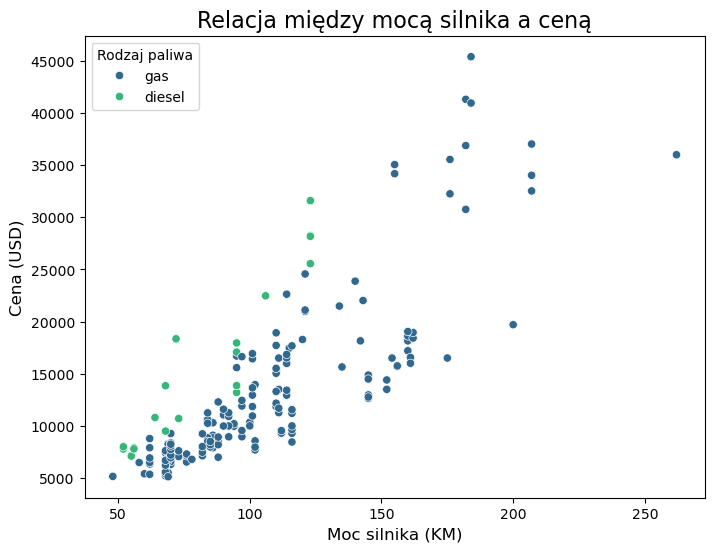

In [16]:
# Relacja między mocą silnika a ceną
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='horsepower', y='price', hue='fuel-type', palette='viridis')
plt.title('Relacja między mocą silnika a ceną', fontsize=16)
plt.xlabel('Moc silnika (KM)', fontsize=12)
plt.ylabel('Cena (USD)', fontsize=12)
plt.legend(title='Rodzaj paliwa', loc='upper left')
plt.show()

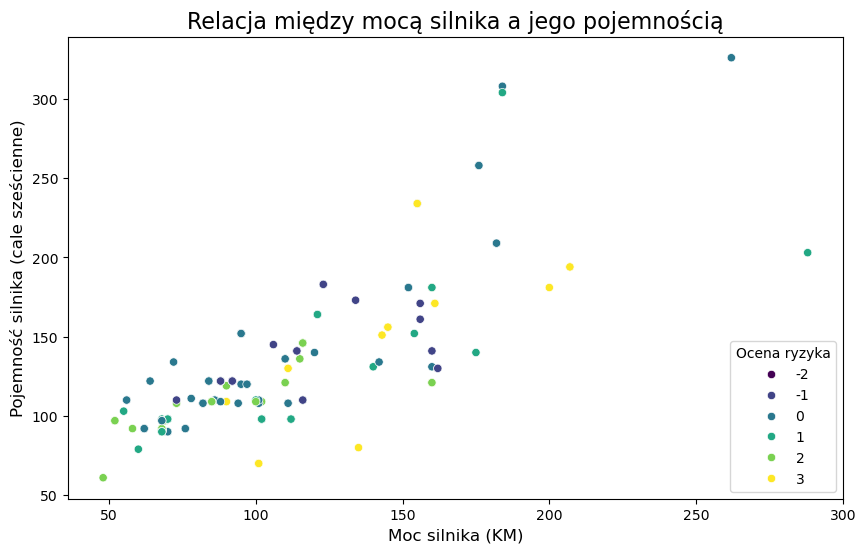

In [17]:
# Relacja między masą własną a oceną ryzyka
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='horsepower', y='engine-size', hue='symboling', palette='viridis')
plt.title('Relacja między mocą silnika a jego pojemnością', fontsize=16)
plt.xlabel('Moc silnika (KM)', fontsize=12)
plt.ylabel('Pojemność silnika (cale sześcienne)', fontsize=12)
plt.legend(title='Ocena ryzyka', loc='lower right')
plt.show()

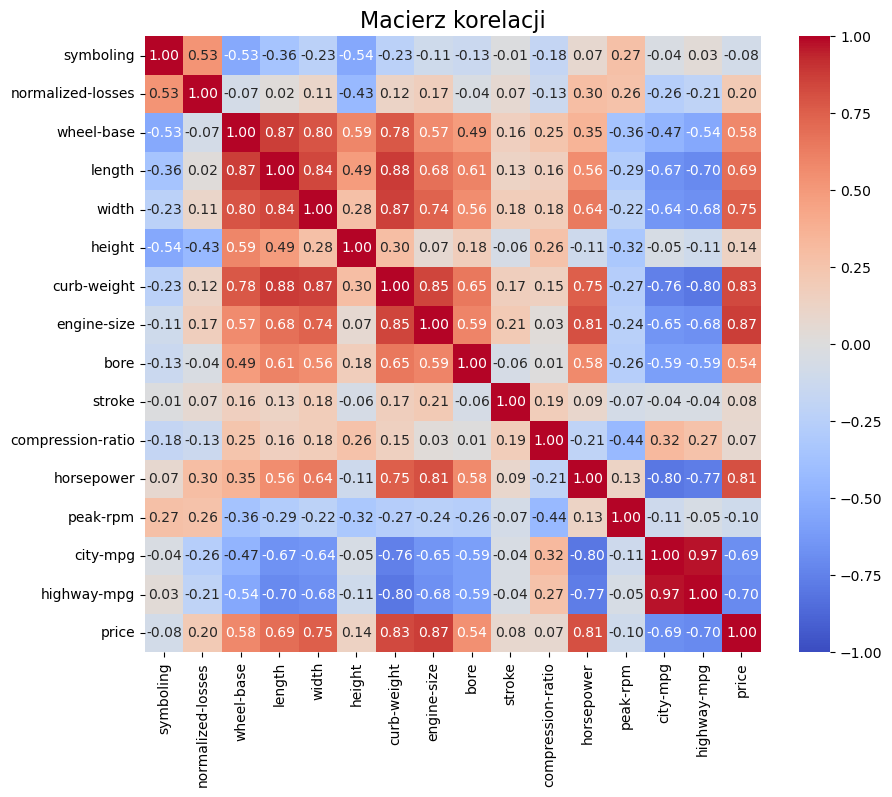

In [18]:
# Korelacja między zmiennymi liczbowymi
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, vmin=-1)
plt.title('Macierz korelacji', fontsize=16)
plt.show()

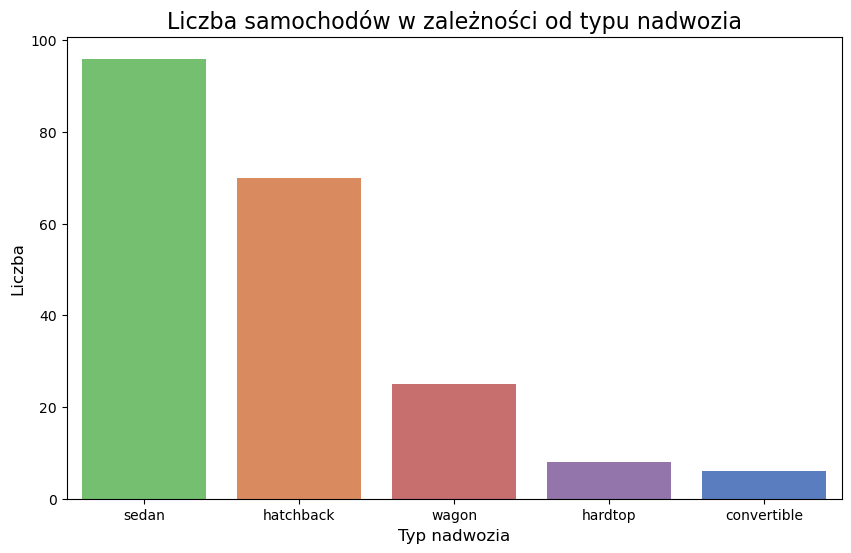

In [19]:
# Wizualizacja liczby samochodów w różnych typach nadwozia
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='body-style', palette='muted', hue='body-style', order=data['body-style'].value_counts().index)
plt.title('Liczba samochodów w zależności od typu nadwozia', fontsize=16)
plt.xlabel('Typ nadwozia', fontsize=12)
plt.ylabel('Liczba', fontsize=12)
plt.show()

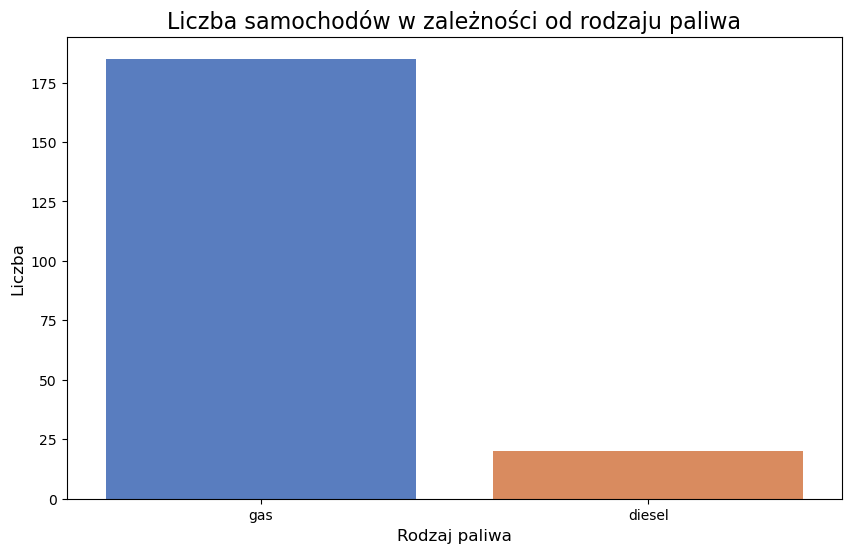

In [20]:
# Wizualizacja rozkładu zależności od rodzaju paliwa
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='fuel-type', palette='muted', hue='fuel-type')
plt.title('Liczba samochodów w zależności od rodzaju paliwa', fontsize=16)
plt.xlabel('Rodzaj paliwa', fontsize=12)
plt.ylabel('Liczba', fontsize=12)
plt.show()

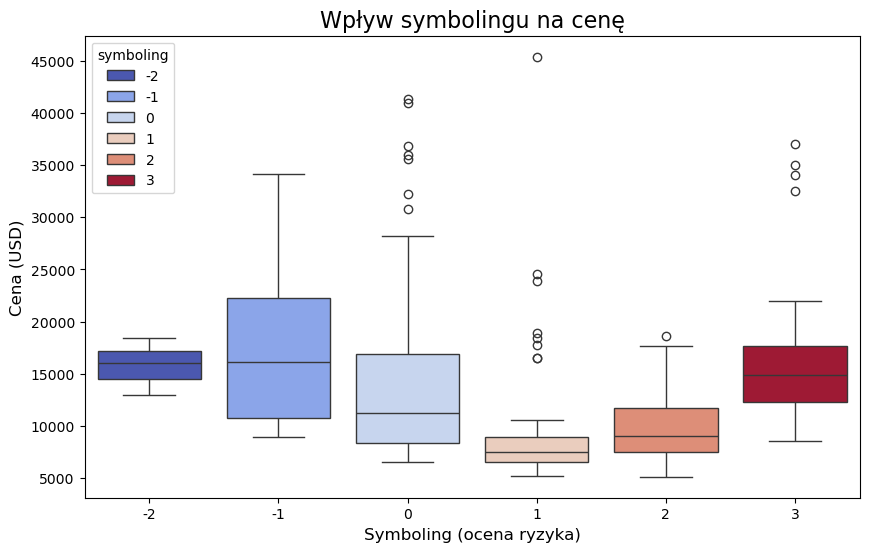

In [21]:
# Wizualizacja wpływu symbolingu na cenę
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='symboling', y='price', palette='coolwarm', hue='symboling')
plt.title('Wpływ symbolingu na cenę', fontsize=16)
plt.xlabel('Symboling (ocena ryzyka)', fontsize=12)
plt.ylabel('Cena (USD)', fontsize=12)
plt.show()

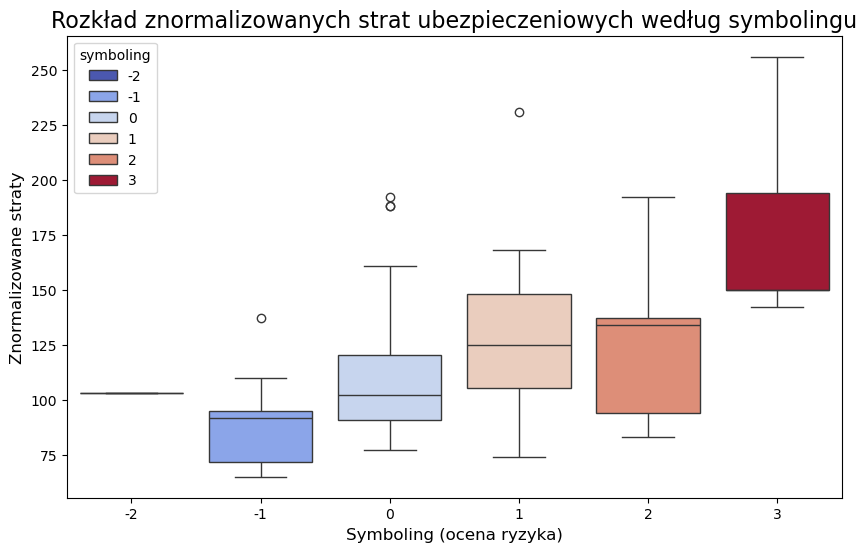

In [22]:
# Wizualizacja rozkładu strat ubezpieczeniowych w zależności od symbolingu
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='symboling', y='normalized-losses', palette='coolwarm', hue='symboling')
plt.title('Rozkład znormalizowanych strat ubezpieczeniowych według symbolingu', fontsize=16)
plt.xlabel('Symboling (ocena ryzyka)', fontsize=12)
plt.ylabel('Znormalizowane straty', fontsize=12)
plt.show()

<h1>3. Przygotowanie danych</h1>

<h2>a) Czyszczenie danych</h2>

In [25]:
# 1. normalized-losses: uzupełniono poprzez medianę w grupach po typie nadwozia i liczbie cylindrów
data["normalized-losses"] = data.groupby(["body-style", "num-of-cylinders"])["normalized-losses"].transform(lambda x: x.fillna(x.median()))
data["normalized-losses"] = data["normalized-losses"].fillna(data["normalized-losses"].median())

# 2. num-of-doors: uzupełniono poprzez najczęstszą wartość
data["num-of-doors"] = data["num-of-doors"].fillna(data["num-of-doors"].mode()[0])

# 3. horsepower: uzupełniono poprzez medianę w grupach po liczbie cylindrów, wymiarach tłoków i współczynniku kompresji
data["horsepower"] = data.groupby(["num-of-cylinders", "bore", "stroke", "compression-ratio"])["horsepower"].transform(lambda x: x.fillna(x.median()))
data["horsepower"] = data["horsepower"].fillna(data["horsepower"].median())

# 4. price: uzupełniono poprzez medianę w grupach po wadze własnej pojazdu i pojemności silnika
data["price"] = data.groupby(["curb-weight", "engine-size"])["price"].transform(lambda x: x.fillna(x.median()))
data["price"] = data["price"].fillna(data["price"].median())

# 5. bore, stroke, peak-rpm: uzupełniono poprzez medianę w grupach po kompresji, pojemności i liczbie cylindrów
for col in ["bore", "stroke", "peak-rpm"]:
    data[col] = data.groupby(["compression-ratio", "engine-size", "num-of-cylinders"])[col].transform(lambda x: x.fillna(x.median()))
    data[col] = data[col].fillna(data[col].median())

In [26]:
# Sprawdzenie braków po uzupełnieniu
print(data.isna().sum())

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


In [27]:
# Postać danych po uzupełnieniu
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,134.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,134.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,197.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


<h2>b) Wybór cech</h2>

In [29]:
selected_features = [
    "symboling", "normalized-losses", "price", "horsepower", 
    "curb-weight", "engine-size", "num-of-cylinders", 
    "body-style", "drive-wheels"
]

# Tworzenie kopii danych z wybranymi cechami
data_selected = data[selected_features].copy()

# Podział na cechy numeryczne i kategoryczne
numerical_features = ["normalized-losses", "price", "horsepower", "curb-weight", "engine-size"]
categorical_features = ["num-of-cylinders", "body-style", "drive-wheels"]

<h2>c) Przekształcenia danych</h2>

In [31]:
# Standaryzacja danych numerycznych
scaler = StandardScaler()
data_selected[numerical_features] = scaler.fit_transform(data_selected[numerical_features])

# One-Hot Encoding dla danych kategorycznych
encoder = OneHotEncoder(sparse_output=False)
encoded_categorical = encoder.fit_transform(data_selected[categorical_features])

# Dodanie zakodowanych kolumn do DataFrame
encoded_columns = encoder.get_feature_names_out(categorical_features)
encoded_df = pd.DataFrame(encoded_categorical, columns=encoded_columns, index=data_selected.index)

# Scalanie danych
data_transformed = pd.concat([data_selected.drop(columns=categorical_features), encoded_df], axis=1)

In [32]:
# Sprawdzenie wyników
data_transformed.head()

,symboling,normalized-losses,price,horsepower,curb-weight,engine-size,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,...,num-of-cylinders_twelve,num-of-cylinders_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,3,0.395662,0.048566,0.180672,-0.014566,0.074449,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3,0.395662,0.429772,0.180672,-0.014566,0.074449,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,2.304864,0.429772,1.272256,0.514882,0.604046,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2,1.304806,0.106286,-0.047799,-0.420797,-0.431076,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2,1.304806,0.550287,0.282214,0.516807,0.218885,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


<h1>4. Tworzenie modelu i ocena algorytmów</h1>

<h2>a) Podział zbioru danych na trening i test</h2>

In [35]:
# Dane wejściowe (X) i wyjściowe (y)
X = data_transformed.drop(columns=["symboling"])
y = data_transformed["symboling"]

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2>b) Wskazanie wykorzystanych algorytmów</h2>

In [37]:
# Wykorzystane modele: regresja liniowa i las losowy
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

<h2>c) Przedstawienie wyników oraz porównanie algorytmów według wskazanych metod oceny</h2>

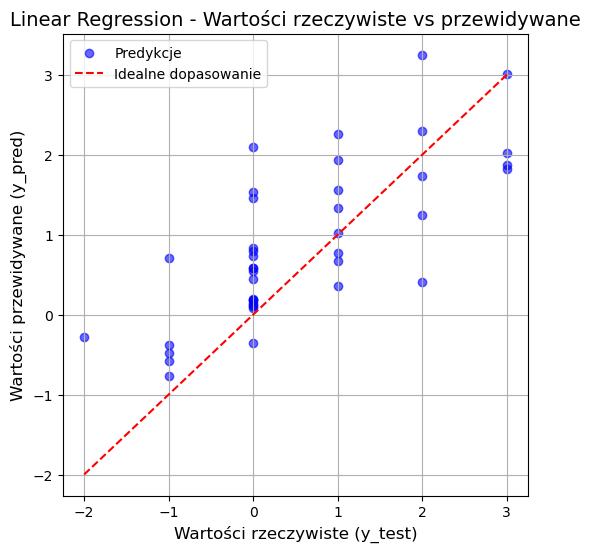

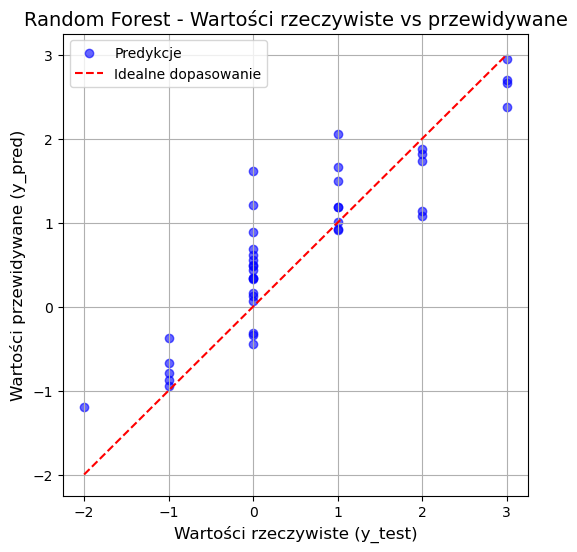

Model: Linear Regression
  MAE: 0.68
  RMSE: 0.87
  R²: 0.49
  Celność: 4.88
  Precyzja: 0.59

Model: Random Forest
  MAE: 0.44
  RMSE: 0.56
  R²: 0.79
  Celność: 19.51
  Precyzja: 0.70



In [39]:
# Trening i ocena modeli
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Metryki
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Zapisanie wyników
    results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

    # Obliczenie celności
    accuracy = np.mean(np.abs((y_test - y_pred) / y_test) <= 0.10) * 100

    # Obliczenie precyzji
    precision = 1 / (1 + mae)

    # Zapisanie wyników
    results[name] = {
        "MAE": mae,
        "RMSE": rmse,
        "R²": r2,
        "Celność": accuracy,
        "Precyzja": precision
    }
    
    # Wykres scatter dla modelu
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label="Predykcje")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Idealne dopasowanie")
    plt.title(f"{name} - Wartości rzeczywiste vs przewidywane", fontsize=14)
    plt.xlabel("Wartości rzeczywiste (y_test)", fontsize=12)
    plt.ylabel("Wartości przewidywane (y_pred)", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

# Wyświetlenie wyników
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.2f}")
    print()

<h2>d) Przedstawienie przykładowego wyniku</h2>

In [41]:
# Wybór 10 losowych próbek ze zbioru testowego
random_samples = X_test.sample(10, random_state=42)
true_symbolings = y_test[random_samples.index]
predicted_symbolings = models["Random Forest"].predict(random_samples)

# Tworzenie DataFrame z wynikami
comparison = pd.DataFrame({
    "True Symboling": true_symbolings,
    "Predicted Symboling": predicted_symbolings
})
comparison.reset_index(drop=True, inplace=True)
print("Przykład działania algorytmu:")
comparison

Przykład działania algorytmu:


,True Symboling,Predicted Symboling
0,1,1.01
1,-1,-0.79
2,0,0.06
3,0,0.16
4,-1,-0.37
5,0,0.34
6,0,0.44
7,3,2.70
8,-2,-1.20
9,0,0.34


<h2>e) Wskazanie lub wykonanie czynności poprawiających wynik</h2>

W celu poprawy wyniku można wykonać następujące czynności:
<ul>
    <li>Optymalizacja hiperparametrów - dla Random Forest można przetestować różne liczby drzew (n_estimators) lub głębokość drzewa (max_depth).</li>
    <li>Przekształcenia cech - wypróbowanie logarytmicznej transformacji cechy "price" w celu zmniejszenia wpływu ekstremalnych wartości.</li>
    <li>Większa liczba danych - większa liczba danych, na których modele mogłby się uczyć.</li>
    <li>Uzupełnienie brakujących danych - wykorzystanie bardziej zaawansowanych metod imputacji (np. predykcji braków przez model regresji).</li>
    <li>Dodanie nowych cech lub ich grupowanie - dzięki temu dane mogłyby zyskiwać na znaczeniu po zastosowaniu logicznego zgrupowania</li>
</ul>

<h4>Poniżej została podjęta próba optymalizacji hiperparametrów modelu Random Forest</h4>

Fitting 5 folds for each of 270 candidates, totalling 1350 fits

Najlepsze parametry dla Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}

Wyniki dla optymalnego modelu Random Forest:
MAE: 0.43
RMSE: 0.55
R²: 0.79
Celność: 14.63
Precyzja: 0.70


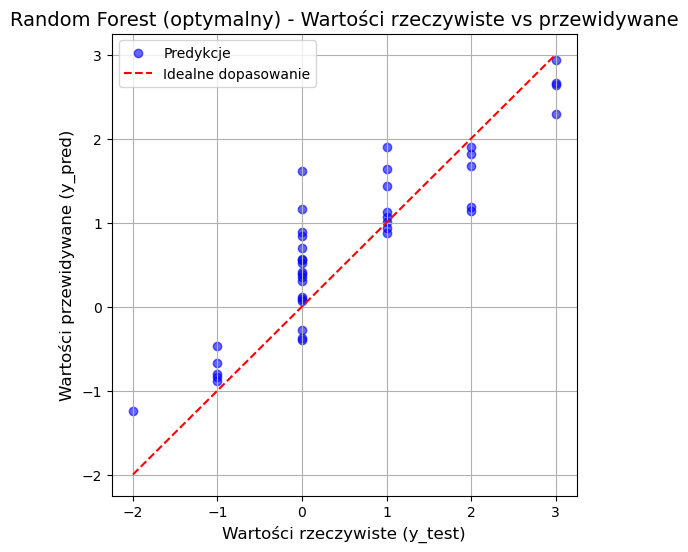

In [45]:
# Definiowanie siatki hiperparametrów
param_grid = {
    "n_estimators": [20, 50, 100, 150, 200, 500],
    "max_depth": [None, 5, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}
rf = RandomForestRegressor(random_state=42)

# Inicjalizacja GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Przeprowadzenie optymalizacji
grid_search.fit(X_train, y_train)

# Najlepsze parametry
best_params = grid_search.best_params_
print(f"\nNajlepsze parametry dla Random Forest: {best_params}")

# Tworzenie modelu z najlepszymi parametrami
best_rf = grid_search.best_estimator_

# Predykcja na zbiorze testowym
y_pred_best_rf = best_rf.predict(X_test)

# Ocena modelu z najlepszymi parametrami
mae = mean_absolute_error(y_test, y_pred_best_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
r2 = r2_score(y_test, y_pred_best_rf)
accuracy = np.mean(np.abs((y_test - y_pred_best_rf) / y_test) <= 0.10) * 100
precision = 1 / (1 + mae)

# Wyniki
print("\nWyniki dla optymalnego modelu Random Forest:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")
print(f"Celność: {accuracy:.2f}")
print(f"Precyzja: {precision:.2f}")

# Wykres dla optymalnego modelu
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_best_rf, alpha=0.6, color='blue', label="Predykcje")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Idealne dopasowanie")
plt.title("Random Forest (optymalny) - Wartości rzeczywiste vs przewidywane", fontsize=14)
plt.xlabel("Wartości rzeczywiste (y_test)", fontsize=12)
plt.ylabel("Wartości przewidywane (y_pred)", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

<h1>5. Podsumowanie - wnioski</h1>

<ol>
    <li><b>Czyszczenie i przygotowanie danych:</b><br>
    Proces imputacji brakujących wartości był kluczowy dla poprawności wyników. Wykorzystanie mediany w grupach o podobnych cechach (np. dla 'horsepower' i 'price') pozwoliło zachować spójność danych i uniknąć potencjalnych błędów wynikających z losowego uzupełniania braków.
    </li><br>
    <li><b>Analiza i wybór cech:</b><br>
    Wybrane cechy, takie jak 'curb-weight', 'engine-size', czy 'horsepower', miały bezpośredni wpływ na tzw. "symboling", czyli ocenę ryzykowności przez ubezpieczalnie. Wykorzystanie kodowania One-Hot Encoding dla cech kategorycznych (np. 'make', 'body-style') poprawiło zdolność modelu do uchwycenia różnic między różnymi klasami pojazdów.
    </li><br>
    <li>
        <b>Ocena modeli predykcyjnych:</b><br><ul>
            <li><i>Random Forest</i> uzyskał lepsze wyniki w przewidywaniu, osiągając niższy błąd średniokwadratowy. Jest to efektem zdolności tego modelu do uchwycenia nieliniowych zależności w danych.
</li>
        <li><i>Regresja liniowa</i> wypadła gorzej, co wskazuje, że zależność między cechami a ceną nie jest w pełni liniowa.</li>
        </ul>
    </li><br>
    <li><b>Znaczenie danych w ubezpieczeniach</b><br>
    Wyniki pokazują, że cechy takie jak 'normalized-losses', 'horsepower' oraz 'body-style' mogą być istotne przy ocenie ryzyka ubezpieczeniowego. Dzięki temu można lepiej szacować składki ubezpieczeniowe, uwzględniając indywidualne cechy pojazdu.
    </li>
</ol>

<b>Napotkane problemy i trudności:</b>
<ul>
    <li>Brak informacji na temat wyników poszczególnych modeli predykcyjnych w repozytorium. Z jednej strony dało to swobode w doborze modelu predykcyjnego, ale z drugiej strony bez sprawdzenia każdego z możliwych nie daje gwarancji, że znaleziony zostanie ten najlepszy.</li>
</ul>